In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn 
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.linear_model import Lasso , Ridge
from sklearn.model_selection import train_test_split

In [2]:
# Firstly, we import our data
df = pd.read_csv('C:\\Users\Siyavash\Desktop\melb_housing\melb_data.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Siyavash\AppData\Local\Temp\ipykernel_6212\70656223.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('C:\\Users\Siyavash\Desktop\melb_housing\melb_data.csv')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
df.shape

(13580, 21)

In [5]:
# detecting and counting missing values
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<Axes: >

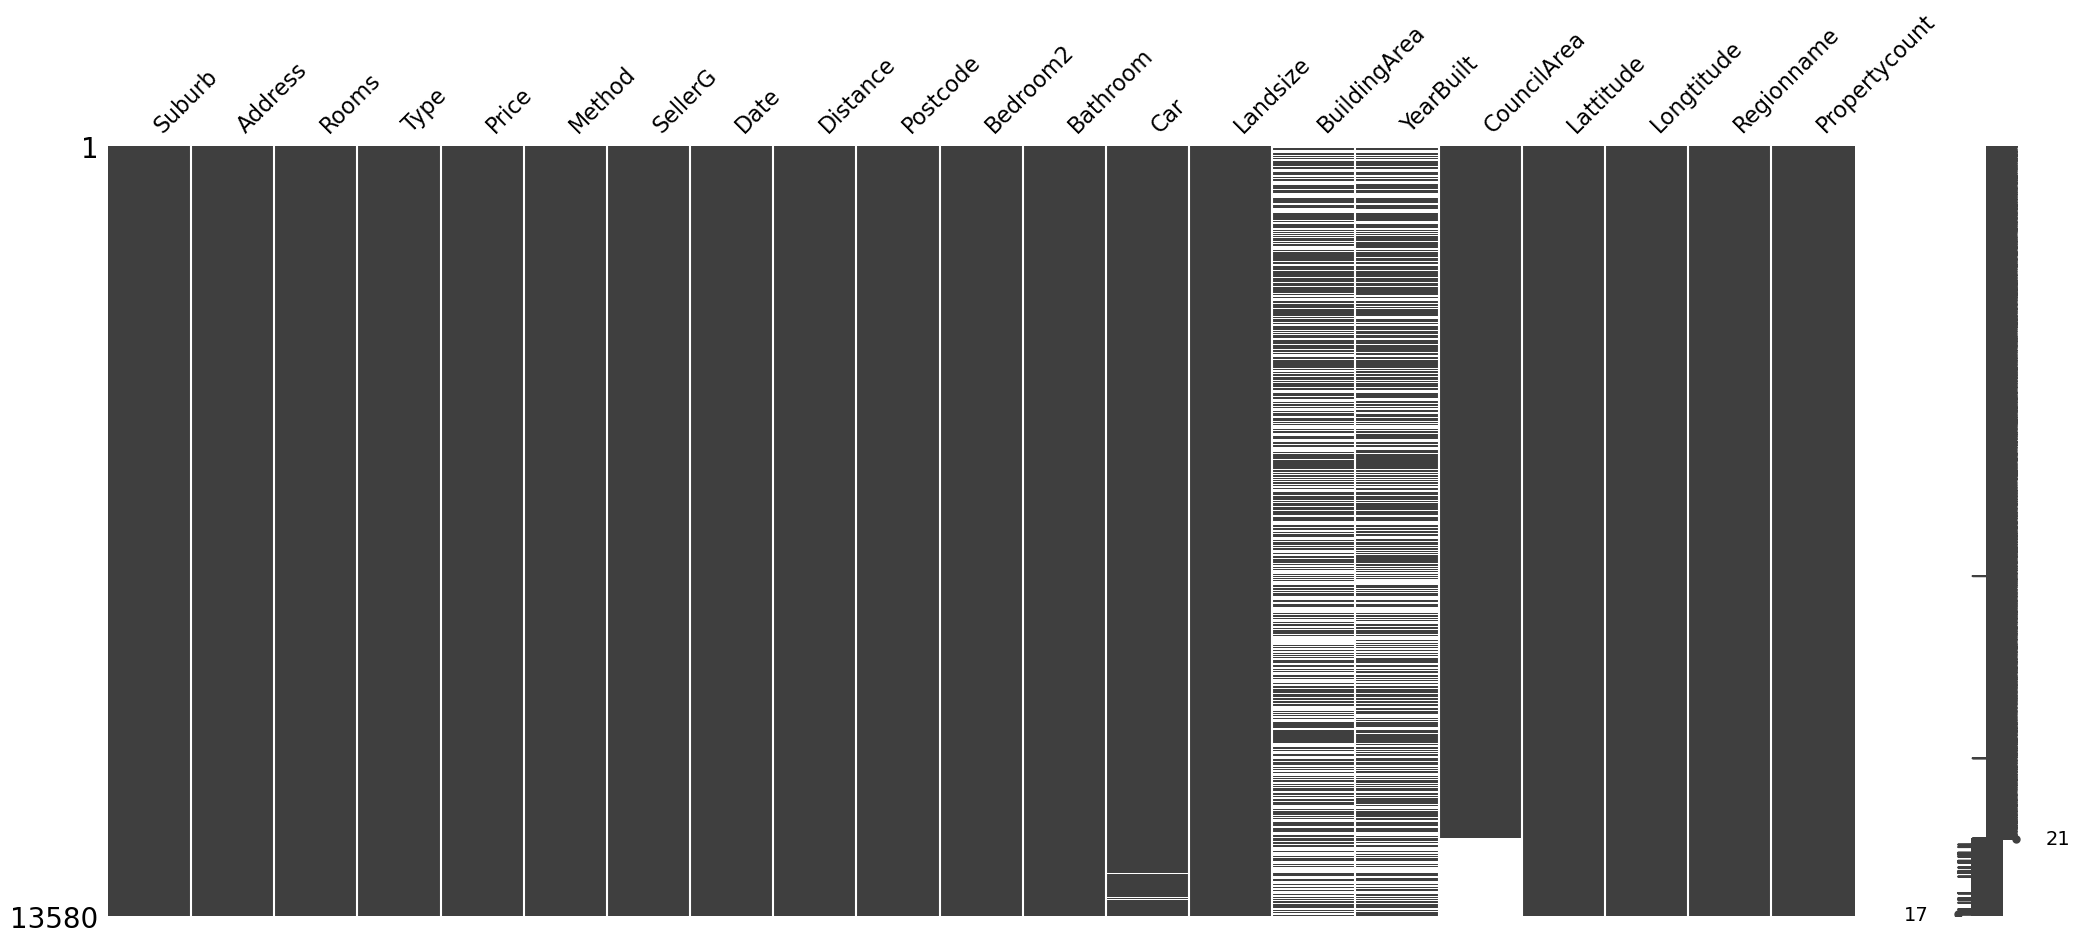

In [6]:
# visualizing missing values
msn.matrix(df)

<Axes: >

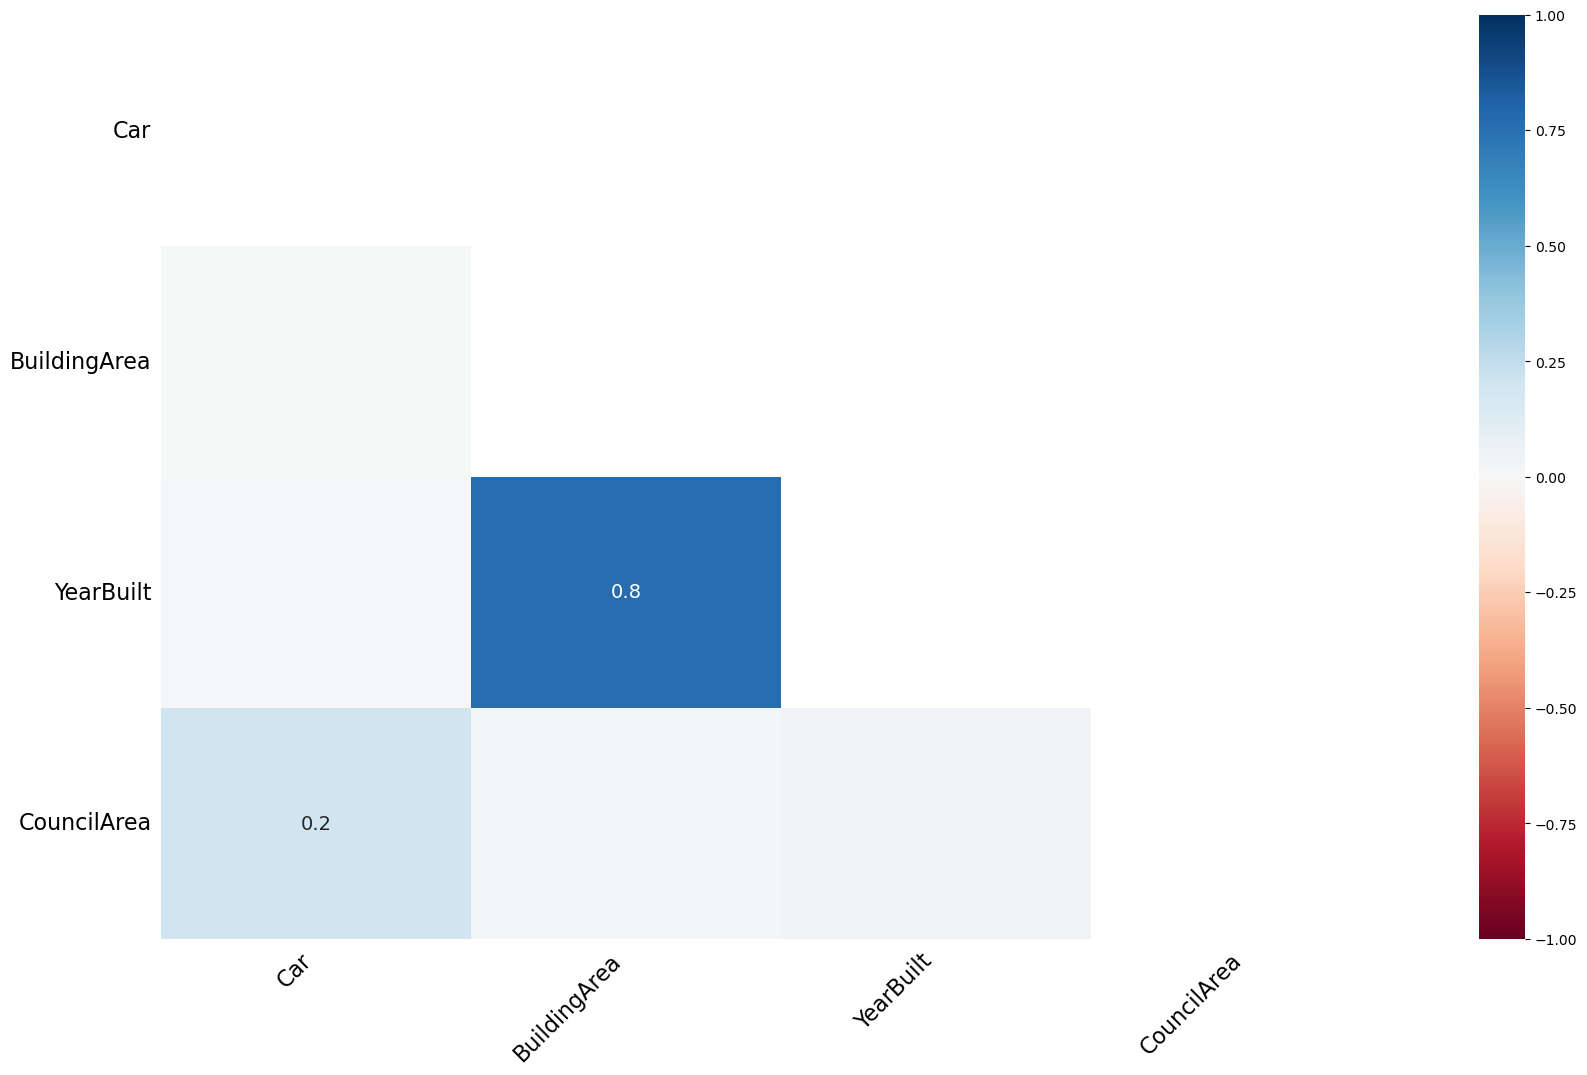

In [7]:
# checking the correlation between columns
msn.heatmap(df)

In [8]:
# In order to clean the data we drop some columns including 'YearBuilt' and 'Buildingarea' due to the numerous missing values
df.drop(['Suburb','SellerG','Postcode','Address','Date','Method','CouncilArea','BuildingArea','YearBuilt'] , axis = 1, inplace = True)

In [9]:
df['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [10]:
# filling missing values in 'Car' column with most frequent value which is 2
most_frequent = df['Car'].value_counts().index[0]
df['Car'].fillna(most_frequent , inplace = True)

C:\Users\Siyavash\AppData\Local\Temp\ipykernel_6212\3320876155.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Car'].fillna(most_frequent , inplace = True)


In [11]:
df['Car'].value_counts()

Car
2.0     5653
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [12]:
df

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,16.7,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,3,h,1031000.0,6.8,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,3,h,1170000.0,6.8,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,4,h,2500000.0,6.8,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [13]:
df['Type'].value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

In [14]:
df['Regionname'].value_counts()

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

In [15]:
# defining x to represent predictor variables and y as the dependent variable
x = df.drop(['Price'] , axis=1).values
y = df['Price']

In [16]:
# using labelencoder to convert categorical data into numeric in 'type' column
le = preprocessing.LabelEncoder()
le.fit(['h','u','t'])
x[:,1] = le.transform(x[:,1])

In [17]:
# doing same thing for 'Regionname' column
le.fit(['Southern Metropolitan','Northern Metropolitan','Western Metropolitan','Eastern Metropolitan','South-Eastern Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'])
x[:,9] = le.transform(x[:,9])  
x

array([[2, 0, 2.5, ..., 144.9984, 2, 4019.0],
       [2, 0, 2.5, ..., 144.9934, 2, 4019.0],
       [3, 0, 2.5, ..., 144.9944, 2, 4019.0],
       ...,
       [3, 0, 6.8, ..., 144.88738, 6, 6380.0],
       [4, 0, 6.8, ..., 144.89299, 6, 6380.0],
       [4, 0, 6.3, ..., 144.88449, 6, 6543.0]], dtype=object)

In [18]:
# normalizing data
Scale = StandardScaler()
Scale.fit(x)
x = Scale.transform(x)

In [19]:
# using LinearRegression to train the model and cross val to obtain a mean score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
reg = LinearRegression()
cv_score = cross_val_score(reg , x , y , cv=5)
np.mean(cv_score)

0.5321847384749575

In [20]:
# trying ridge and lasso to find the best model
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_lasso=lasso.predict(x_test)
lcv_score = cross_val_score(lasso , x , y , cv=5)
np.mean(lcv_score)

0.532184882515333

In [21]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_ridge=ridge.predict(x_test)
rcv_score = cross_val_score(ridge , x , y , cv=5)
np.mean(rcv_score)

0.5321861440413204

In [22]:
pred = cross_val_predict(ridge , x , y , cv=5)
pred

array([1173283.30408566, 1137145.27778175, 1511674.4477365 , ...,
       1578568.25920526, 1649464.31006234, 1362840.07060701])

In [23]:
r2_score(y , pred)

0.5390424369845306

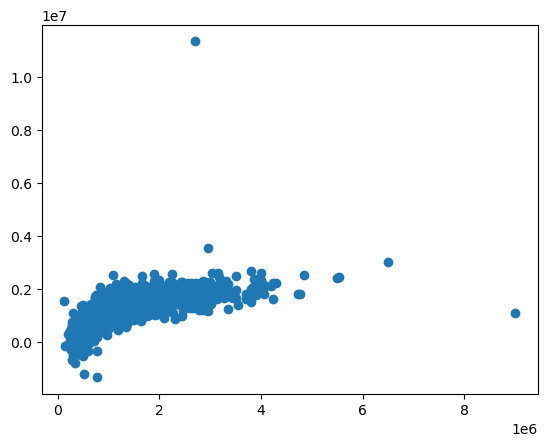

In [24]:
plt.scatter(y_test,y_ridge)
plt.show()

In [136]:
# predicting a new case's price with folowing features
# features = [[Rooms , Type	,  Distance	, Bedroom2	, Bathroom	, Car	, Landsize	, Lattitude	, Longtitude	, Regionname	, Propertycount]]
features = np.array([[2 , 1 , 160 , 1 , 1 , 1 , 100 , -37.9 , 140 , 1 , 3600]])
predict = ridge.predict(features)
predict

array([1704717.69193125])